# INTRODUCTION

# 1. Business Understanding

***Questions & Hypothesis***

***Hypothesis:***

1. The locations with the most clients have the highest churn rates.
2. Long term contracts results in low churn rates.
3. The lower the topup amount, the higher the churn rate
4. Customers who frequently refill up are less likely to churn.
5. Revenue higher than the mean customer revene are less liely to churn.
6. The higher the number of times a customer makes an income, the less the customer will churn.
7. The more customers utilize inter expresso calls the less likely the customer will churn.
8. The more calls are placed on Orange the less likely the customer will churn.
9. The more calls are placed on Tigo the less likely the customer will churn.
10. The more regular a customer is the less likely he will churn.
11. the higher the frequecy_top_package the more likely the customer will churn.

***Questions:***
1. Does locations with the most clients have the highest churn rates?
2. Does long term contracts results in low churn rates?
3. Does a lower the topup amount imply a high likelihood of the churning?
4. Does frequent refill result in a less likelihood to churn?
5. Does revenue higher than the mean customer revenue imply a low likelihood of customer churn?
6. Does the higher the number of times a customer makes an income imply a less likelihood of customer churn?
7. Does the more customers utilize inter expresso calls result in a less likelihood of the customer churning?
8. Does the more calls a customer place on Orange result in a less likelihood of the customer churning?
9. Does the more calls a customer place on Tigo result in a less likelihood of the customer churning?
10. Are regular customers less likely to will churn?
11. Does a higher frequecy_top_package imply a more liklihood of customer churn?


# 2. Data Understanding

>We basically want to understand and predict accurately the reasons for customer churn(leaving) \
and as to when they are likely to leave

>The project seeks to identify the likelihood of customers leaving, the key indicators of customer churn,\
and to suggest strategies to help address customer churn rate.

***Load Relevant Libraries & Explore The Data***

In [1]:
# Models
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import plotly.express as px

import warnings
warnings.filterwarnings('ignore')


In [2]:
# Load the Train and Test Data
train_data = pd.read_csv("C:/Users/Ebenezer Edusei/anaconda3/envs/PythonEnv/Edusei_Demo/Capstone Project/Train.csv")
test_data = pd.read_csv("C:/Users/Ebenezer Edusei/anaconda3/envs/PythonEnv/Edusei_Demo/Capstone Project/Test.csv")

In [3]:
train_data.head()

,user_id,REGION,TENURE,MONTANT,FREQUENCE_RECH,REVENUE,ARPU_SEGMENT,FREQUENCE,DATA_VOLUME,ON_NET,ORANGE,TIGO,ZONE1,ZONE2,MRG,REGULARITY,TOP_PACK,FREQ_TOP_PACK,CHURN
0,7ee9e11e342e27c70455960acc80d3f91c1286d1,DAKAR,K > 24 month,20000.0,47.0,21602.0,7201.0,52.0,8835.0,3391.0,396.0,185.0,NaN,NaN,NO,62,On net 200F=Unlimited _call24H,30.0,0
1,50443f42bdc92b10388fc56e520e4421a5fa655c,NaN,K > 24 month,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NO,3,NaN,NaN,0
2,da90b5c1a9b204c186079f89969aa01cb03c91b2,NaN,K > 24 month,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NO,1,NaN,NaN,0
3,364ec1b424cdc64c25441a444a16930289a0051e,SAINT-LOUIS,K > 24 month,7900.0,19.0,7896.0,2632.0,25.0,9385.0,27.0,46.0,20.0,NaN,2.0,NO,61,"Data:490F=1GB,7d",7.0,0
4,d5a5247005bc6d41d3d99f4ef312ebb5f640f2cb,DAKAR,K > 24 month,12350.0,21.0,12351.0,4117.0,29.0,9360.0,66.0,102.0,34.0,NaN,NaN,NO,56,All-net 500F=2000F;5d,11.0,0


In [4]:
train_data.shape

(1077024, 19)

In [5]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1077024 entries, 0 to 1077023
Data columns (total 19 columns):
 #   Column          Non-Null Count    Dtype  
---  ------          --------------    -----  
 0   user_id         1077024 non-null  object 
 1   REGION          652687 non-null   object 
 2   TENURE          1077024 non-null  object 
 3   MONTANT         699139 non-null   float64
 4   FREQUENCE_RECH  699139 non-null   float64
 5   REVENUE         714669 non-null   float64
 6   ARPU_SEGMENT    714669 non-null   float64
 7   FREQUENCE       714669 non-null   float64
 8   DATA_VOLUME     547261 non-null   float64
 9   ON_NET          683850 non-null   float64
 10  ORANGE          629880 non-null   float64
 11  TIGO            432250 non-null   float64
 12  ZONE1           84898 non-null    float64
 13  ZONE2           68794 non-null    float64
 14  MRG             1077024 non-null  object 
 15  REGULARITY      1077024 non-null  int64  
 16  TOP_PACK        626129 non-null   ob

In [7]:
train_data.isnull().sum() * 100 / len(train_data) #Checking percentage of null values per column

user_id            0.000000
REGION            39.399029
TENURE             0.000000
MONTANT           35.086033
FREQUENCE_RECH    35.086033
REVENUE           33.644097
ARPU_SEGMENT      33.644097
FREQUENCE         33.644097
DATA_VOLUME       49.187669
ON_NET            36.505593
ORANGE            41.516624
TIGO              59.866261
ZONE1             92.117353
ZONE2             93.612584
MRG                0.000000
REGULARITY         0.000000
TOP_PACK          41.864898
FREQ_TOP_PACK     41.864898
CHURN              0.000000
dtype: float64

***Inference:***

from the output of the previous line of code, it is evident that our train_data has a lot of missing data. The least percentage of missing data is 33.6% and the most percentage of missing data is 93.6%. In order to have a model that accurately predicts customer churn, our data would have to be reduced and cleaned before the model is trained.

# Test Data

In [8]:
test_data.head()

,user_id,REGION,TENURE,MONTANT,FREQUENCE_RECH,REVENUE,ARPU_SEGMENT,FREQUENCE,DATA_VOLUME,ON_NET,ORANGE,TIGO,ZONE1,ZONE2,MRG,REGULARITY,TOP_PACK,FREQ_TOP_PACK
0,51fe4c3347db1f8571d18ac03f716c41acee30a4,MATAM,I 18-21 month,2500.0,5.0,2500.0,833.0,5.0,0.0,64.0,70.0,NaN,NaN,NaN,NO,35,All-net 500F=2000F;5d,5.0
1,5ad5d67c175bce107cc97b98c4e37dcc38aa7f3e,NaN,K > 24 month,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NO,2,NaN,NaN
2,5a4db591c953a8d8f373877fad37aaf4268899a1,NaN,K > 24 month,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NO,22,NaN,NaN
3,8bf9b4d8880aeba1c9a0da48be78f12e629be37c,NaN,K > 24 month,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NO,6,NaN,NaN
4,c7cdf2af01e9fa95bf498b68c122aa4b9a8d10df,SAINT-LOUIS,K > 24 month,5100.0,7.0,5637.0,1879.0,15.0,7783.0,30.0,24.0,0.0,0.0,NaN,NO,60,"Data:1000F=2GB,30d",4.0


In [9]:
test_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 190063 entries, 0 to 190062
Data columns (total 18 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   user_id         190063 non-null  object 
 1   REGION          115330 non-null  object 
 2   TENURE          190063 non-null  object 
 3   MONTANT         123695 non-null  float64
 4   FREQUENCE_RECH  123695 non-null  float64
 5   REVENUE         126422 non-null  float64
 6   ARPU_SEGMENT    126422 non-null  float64
 7   FREQUENCE       126422 non-null  float64
 8   DATA_VOLUME     96716 non-null   float64
 9   ON_NET          120771 non-null  float64
 10  ORANGE          111417 non-null  float64
 11  TIGO            76555 non-null   float64
 12  ZONE1           14850 non-null   float64
 13  ZONE2           12011 non-null   float64
 14  MRG             190063 non-null  object 
 15  REGULARITY      190063 non-null  int64  
 16  TOP_PACK        110773 non-null  object 
 17  FREQ_TOP_P

In [10]:
test_data.shape

(190063, 18)

In [11]:
test_data.isnull().sum() * 100 / len(test_data) #Checking percentage of null values per column in the test data

user_id            0.000000
REGION            39.320120
TENURE             0.000000
MONTANT           34.918948
FREQUENCE_RECH    34.918948
REVENUE           33.484161
ARPU_SEGMENT      33.484161
FREQUENCE         33.484161
DATA_VOLUME       49.113715
ON_NET            36.457385
ORANGE            41.378911
TIGO              59.721250
ZONE1             92.186801
ZONE2             93.680516
MRG                0.000000
REGULARITY         0.000000
TOP_PACK          41.717746
FREQ_TOP_PACK     41.717746
dtype: float64

# 3. Data Preparation

***TRAIN DATA***

In [12]:
#Droping columns with over 45% missing data
train = train_data.drop(columns=["TIGO", "ZONE1", "ZONE2"])

In [13]:
train.corr()

,MONTANT,FREQUENCE_RECH,REVENUE,ARPU_SEGMENT,FREQUENCE,DATA_VOLUME,ON_NET,ORANGE,REGULARITY,FREQ_TOP_PACK,CHURN
MONTANT,1.000000,0.791875,0.976696,0.976696,0.776145,0.307393,0.324712,0.656019,0.522629,0.740936,-0.105110
FREQUENCE_RECH,0.791875,1.000000,0.798738,0.798737,0.955882,0.158125,0.403519,0.519295,0.558206,0.869419,-0.123849
REVENUE,0.976696,0.798738,1.000000,1.000000,0.786208,0.313408,0.329744,0.659143,0.532299,0.751271,-0.114401
ARPU_SEGMENT,0.976696,0.798737,1.000000,1.000000,0.786207,0.313408,0.329744,0.659144,0.532297,0.751270,-0.114402
FREQUENCE,0.776145,0.955882,0.786208,0.786207,1.000000,0.174710,0.392982,0.472755,0.591730,0.845926,-0.139982
DATA_VOLUME,0.307393,0.158125,0.313408,0.313408,0.174710,1.000000,-0.014208,0.061651,0.187996,0.123775,-0.033699
ON_NET,0.324712,0.403519,0.329744,0.329744,0.392982,-0.014208,1.000000,0.219325,0.269578,0.354593,-0.058102
ORANGE,0.656019,0.519295,0.659143,0.659144,0.472755,0.061651,0.219325,1.000000,0.311036,0.553373,-0.064132
REGULARITY,0.522629,0.558206,0.532299,0.532297,0.591730,0.187996,0.269578,0.311036,1.000000,0.446945,-0.479746
FREQ_TOP_PACK,0.740936,0.869419,0.751271,0.751270,0.845926,0.123775,0.354593,0.553373,0.446945,1.000000,-0.086267


In [14]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1077024 entries, 0 to 1077023
Data columns (total 16 columns):
 #   Column          Non-Null Count    Dtype  
---  ------          --------------    -----  
 0   user_id         1077024 non-null  object 
 1   REGION          652687 non-null   object 
 2   TENURE          1077024 non-null  object 
 3   MONTANT         699139 non-null   float64
 4   FREQUENCE_RECH  699139 non-null   float64
 5   REVENUE         714669 non-null   float64
 6   ARPU_SEGMENT    714669 non-null   float64
 7   FREQUENCE       714669 non-null   float64
 8   DATA_VOLUME     547261 non-null   float64
 9   ON_NET          683850 non-null   float64
 10  ORANGE          629880 non-null   float64
 11  MRG             1077024 non-null  object 
 12  REGULARITY      1077024 non-null  int64  
 13  TOP_PACK        626129 non-null   object 
 14  FREQ_TOP_PACK   626129 non-null   float64
 15  CHURN           1077024 non-null  int64  
dtypes: float64(9), int64(2), object(5)
m

In [15]:
# Delete rows containing either 50% or more than 75% NaN Values
perc = 60.0 # Here N is 75
min_count =  int(((100-perc)/100)*train.shape[1] + 1)
mod_df = train.dropna( axis=0, 
                    thresh=min_count)

In [16]:
mod_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 790944 entries, 0 to 1077023
Data columns (total 16 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   user_id         790944 non-null  object 
 1   REGION          605749 non-null  object 
 2   TENURE          790944 non-null  object 
 3   MONTANT         699139 non-null  float64
 4   FREQUENCE_RECH  699139 non-null  float64
 5   REVENUE         714669 non-null  float64
 6   ARPU_SEGMENT    714669 non-null  float64
 7   FREQUENCE       714669 non-null  float64
 8   DATA_VOLUME     527253 non-null  float64
 9   ON_NET          674824 non-null  float64
 10  ORANGE          629247 non-null  float64
 11  MRG             790944 non-null  object 
 12  REGULARITY      790944 non-null  int64  
 13  TOP_PACK        626129 non-null  object 
 14  FREQ_TOP_PACK   626129 non-null  float64
 15  CHURN           790944 non-null  int64  
dtypes: float64(9), int64(2), object(5)
memory usage: 102.6+

In [17]:
mod_df.isnull().sum() * 100 / len(mod_df) #Checking percentage of null values per column

user_id            0.000000
REGION            23.414426
TENURE             0.000000
MONTANT           11.607016
FREQUENCE_RECH    11.607016
REVENUE            9.643540
ARPU_SEGMENT       9.643540
FREQUENCE          9.643540
DATA_VOLUME       33.338770
ON_NET            14.681191
ORANGE            20.443546
MRG                0.000000
REGULARITY         0.000000
TOP_PACK          20.837758
FREQ_TOP_PACK     20.837758
CHURN              0.000000
dtype: float64

***Feature: Region***

The region feature has about 39.4% null values which wold have to be addressed. Here, an initial visualization wold be done to appreciate the Mode value in the Region column and use it to replace the missing values.

<AxesSubplot:xlabel='count', ylabel='REGION'>

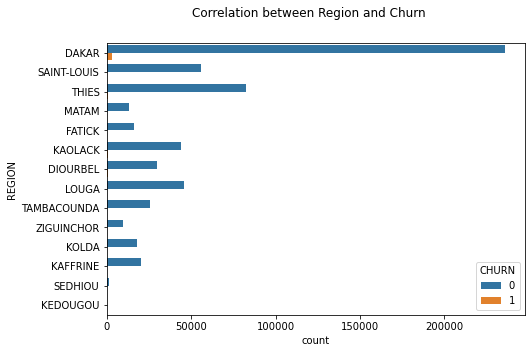

In [18]:
#Plotting the filtered datasets for the Region Column
fig, axes = plt.subplots(figsize=(7.5, 5))
 
fig.suptitle('Correlation between Region and Churn')

sns.countplot(data=mod_df, y='REGION', hue='CHURN')

In [19]:
def fill_na_embarked(mod_df, colname): #a function to replace the NaN values with the mode
    
    return mod_df[colname].fillna('DAKAR')
    
mod_df['REGION'] = fill_na_embarked(mod_df, 'REGION')

<AxesSubplot:xlabel='count', ylabel='REGION'>

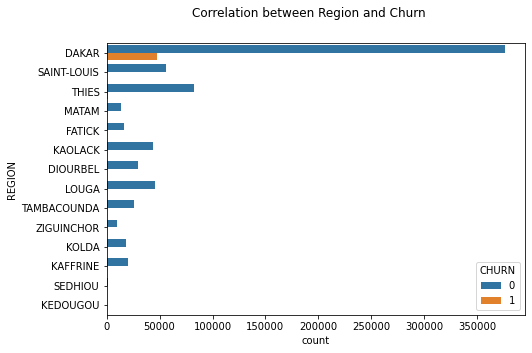

In [20]:
#Plotting the filtered datasets for the Region Column
fig, axes = plt.subplots(figsize=(7.5, 5))
 
fig.suptitle('Correlation between Region and Churn')

sns.countplot(data=mod_df, y='REGION', hue='CHURN')

In [21]:
top_reg = mod_df.groupby(by='REGION').CHURN.agg('count')
regs = top_reg.nlargest(5).reset_index(name='top5_churn_regions')
#top_regions = reg_churn['1'].nlargest(5).reset_index(name='top5_region_churn')

<AxesSubplot:xlabel='REGION'>

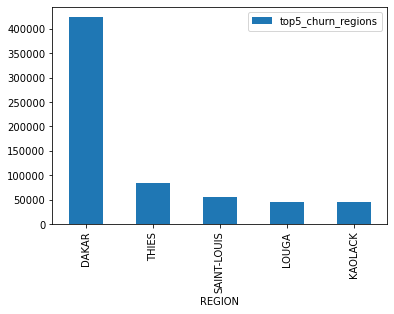

In [22]:
regs.plot(kind='bar', x='REGION', y='top5_churn_regions')

In [23]:
reg_churn = pd.crosstab(mod_df['REGION'], mod_df['CHURN']) #Determining the customer churn decisions for each region
reg_churn

CHURN,0,1
REGION,,
DAKAR,376244,47899
DIOURBEL,29724,599
FATICK,16321,166
KAFFRINE,20581,103
KAOLACK,43844,592
KEDOUGOU,433,16
KOLDA,17974,119
LOUGA,45551,393
MATAM,13307,209


***Question One:***
>Based on the analysis, it is clear that most of the cuustomer are coming from the same location (Dakar). Also, Dakar records the region with the highest customer churn. This trend is clearly seen in the other regions as they decend in the total count of customers. By implication, our first hypothesis is validated. In our feature engineering, the location should be set to Dakar for easy prediction.

<AxesSubplot:xlabel='REGION'>

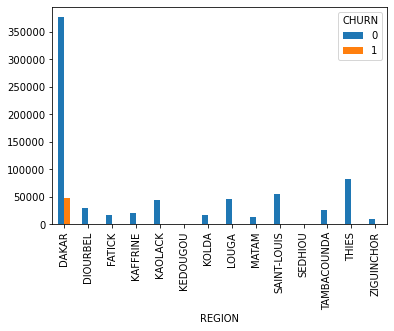

In [24]:
reg_churn.plot(kind='bar') #plotting the survival rate per sex

***Feature: Tenure**

<AxesSubplot:xlabel='count', ylabel='TENURE'>

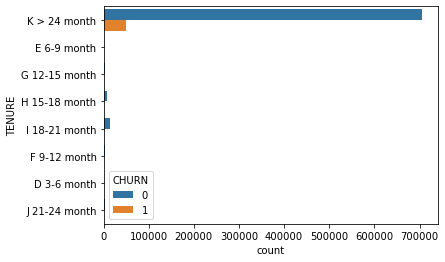

In [25]:
sns.countplot(data=mod_df, y='TENURE', hue='CHURN')

***Inference:***
The tenure column has no missing data.

In [26]:
top_tenure = mod_df.groupby(by='TENURE').CHURN.agg('count') #Identifying the top 5 prefered tenure
tenure = top_tenure.nlargest(5).reset_index(name='top5_churn_tenure')
#top_regions = reg_churn['1'].nlargest(5).reset_index(name='top5_region_churn')

<AxesSubplot:xlabel='TENURE'>

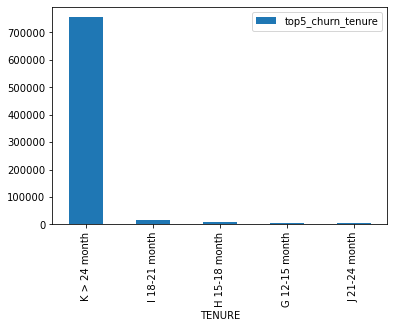

In [27]:
tenure.plot(kind='bar', x='TENURE', y='top5_churn_tenure')

In [28]:
ten_churn = pd.crosstab(mod_df['TENURE'], mod_df['CHURN']) #Determining the customer churn decision per tenure
ten_churn

CHURN,0,1
TENURE,,
D 3-6 month,304,32
E 6-9 month,676,87
F 9-12 month,2807,361
G 12-15 month,4139,491
H 15-18 month,7577,681
I 18-21 month,13265,1231
J 21-24 month,3980,260
K > 24 month,706293,48760


In [29]:
#Sorting the values in the 'TENURE' column into 3 categories: short_term, medium_term, and long_term
#create a dictionary mapping old values to new values
mapping = {'D 3-6 month': "short_term", 'E 6-9 month': "short_term", 'F 9-12 month': "short_term",
    'G 12-15 month': "medium_term", '15-18 month': "medium_term", 'I 18-21 month': "medium_term",
    'J 21-24 month': "long_term", 'K > 24 month': "long_term"}

In [30]:
#use the map() to apply the mapping to the Tenure column
mod_df['duration'] = mod_df['TENURE'].map(mapping)

In [31]:
mod_df.head()

,user_id,REGION,TENURE,MONTANT,FREQUENCE_RECH,REVENUE,ARPU_SEGMENT,FREQUENCE,DATA_VOLUME,ON_NET,ORANGE,MRG,REGULARITY,TOP_PACK,FREQ_TOP_PACK,CHURN,duration
0,7ee9e11e342e27c70455960acc80d3f91c1286d1,DAKAR,K > 24 month,20000.0,47.0,21602.0,7201.0,52.0,8835.0,3391.0,396.0,NO,62,On net 200F=Unlimited _call24H,30.0,0,long_term
3,364ec1b424cdc64c25441a444a16930289a0051e,SAINT-LOUIS,K > 24 month,7900.0,19.0,7896.0,2632.0,25.0,9385.0,27.0,46.0,NO,61,"Data:490F=1GB,7d",7.0,0,long_term
4,d5a5247005bc6d41d3d99f4ef312ebb5f640f2cb,DAKAR,K > 24 month,12350.0,21.0,12351.0,4117.0,29.0,9360.0,66.0,102.0,NO,56,All-net 500F=2000F;5d,11.0,0,long_term
5,b91a81e590d0dd029d99002d4226b9ca2cdf3cbc,DAKAR,E 6-9 month,2000.0,2.0,2000.0,667.0,3.0,4206.0,246.0,709.0,NO,62,"On-net 500=4000,10d",1.0,0,short_term
6,42335a2a6a2a4cd30452ce9bc611bd66b3a9d4c2,DAKAR,K > 24 month,3000.0,1.0,3000.0,1000.0,1.0,NaN,NaN,NaN,NO,6,"Data:3000F=10GB,30d",1.0,0,long_term


In [32]:
churn_rates = mod_df.groupby('duration')['CHURN'].mean() * 100
print(churn_rates)
#dur_churn = pd.crosstab(mod_df['duration'], mod_df['CHURN'])
#dur_churn

duration
long_term       6.456006
medium_term     9.003451
short_term     11.249121
Name: CHURN, dtype: float64


***Question 2: Does long term contracts results in low churn rates?***
>Based on this analysis, it can be inferred that comparatively, customers on a short term contract are likelily to churn as compared to customers on a medium and long term contract. By implication, customers the longer the customer stays with the telco, the longer the customer is less likely to churn.

***Feature: MRG***

<AxesSubplot:xlabel='count', ylabel='MRG'>

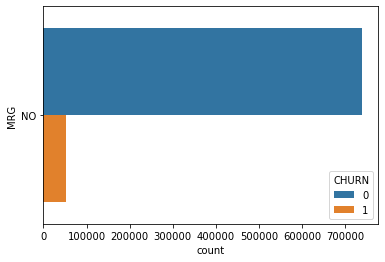

In [33]:
sns.countplot(data=mod_df, y='MRG', hue='CHURN')

***Inference:***
The MRG column has no missing data.

***Feature: Top_Pack***

<AxesSubplot:xlabel='count', ylabel='TOP_PACK'>

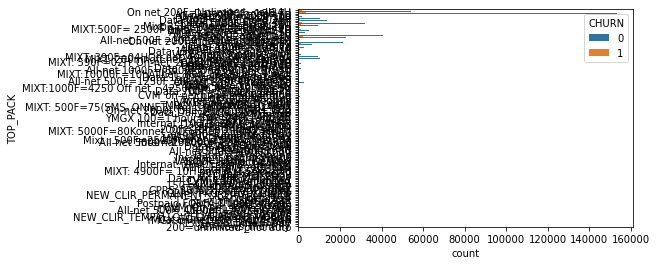

In [34]:
sns.countplot(data=mod_df, y='TOP_PACK', hue='CHURN')

The data from the top_pack column has over 100 values as its entries. As such it is difficult to view the which particular package has the most customer churn. To solve this, the top 5 packages will have to be deduced and the values in the column mapped to them accordingly. In essence a new column called 'packages' will be created and will contain the values; 'on_net', 'all_net', 'data', 'Mixt', and 'other_packages'.

In [35]:
#Filtering for the top 5 packages
top_5_packages = mod_df.groupby(by='TOP_PACK').MRG.agg('count')

top_packages = top_5_packages.nlargest(5).reset_index(name='top5_packages')

In [36]:
top_packages

,TOP_PACK,top5_packages
0,All-net 500F=2000F;5d,158779
1,On net 200F=Unlimited _call24H,76302
2,"Data:490F=1GB,7d",57679
3,"Data: 100 F=40MB,24H",42515
4,Mixt 250F=Unlimited_call24H,33620


In [37]:
#create a dictionary mapping old values to new values in the Top Pacckage column
package_mapping = {'On net 200F=Unlimited _call24H': 'on_net', 'Data:490F=1GB,7d': 'data','All-net 500F=2000F;5d': 'all_net', 
'On-net 500=4000,10d': 'on_net', 'Data:3000F=10GB,30d': 'data', 'Data:200F=Unlimited,24H': 'data','IVR Echat_Daily_50F': 'other_package', 'Data:1000F=2GB,30d': 'data',
'Mixt 250F=Unlimited_call24H': 'Mixt', 'On-net 1000F=10MilF;10d': 'on_net', 'MIXT:500F= 2500F on net _2500F off net;2d': 'Mixt',
'Data: 200 F=100MB,24H': 'data', 'All-net 600F= 3000F ;5d': 'all_net', 'On-net 200F=60mn;1d': 'on_net', 'Twter_U2opia_Daily': 'other_package',
'Data: 100 F=40MB,24H': 'data', 'All-net 500F =2000F_AllNet_Unlimited': 'all_net', 'On net 200F= 3000F_10Mo ;24H': 'on_net' , '200=Unlimited1Day':'other_package', 'Jokko_Daily': 'other_package',
'Data:1000F=5GB,7d': 'data', 'Data:700F=1.5GB,7d': 'data', 'All-net 1000=5000;5d': 'all_net', 'Data:150F=SPPackage1,24H': 'data', 'IVR Echat_Monthly_500F': 'other_package',
'VAS(IVR_Radio_Daily)': 'other_package', 'MIXT: 390F=04HOn-net_400SMS_400 Mo;4h\t': 'Mixt', 'MIXT: 200mnoff net _unl on net _5Go;30d': 'Mixt', 'On-net 500F_FNF;3d': 'on_net',
'MIXT: 590F=02H_On-net_200SMS_200 Mo;24h\t\t': 'Mixt', 'Data:1500F=3GB,30D': 'data', 'Data:300F=100MB,2d': 'data', 'Data:500F=2GB,24H': 'data',
'Data: 490F=Night,00H-08H': 'data', 'All-net 1000F=(3000F On+3000F Off);5d': 'all_net', 'New_YAKALMA_4_ALL': 'other_package',
'MIXT:10000F=10hAllnet_3Go_1h_Zone3;30d\t\t': 'Mixt', 'Yewouleen_PKG': 'other_package', 'Data:1500F=SPPackage1,30d': 'data', 'WIFI_Family_2MBPS': 'other_package',
'All-net 500F=1250F_AllNet_1250_Onnet;48h': 'all_net', 'On-net 300F=1800F;3d': 'on_net', 'Twter_U2opia_Weekly': 'other_package', 'Data:50F=30MB_24H': 'data',
'MIXT:1000F=4250 Off net _ 4250F On net _100Mo; 5d': 'Mixt', 'WIFI_ Family _4MBPS': 'other_package', 'Data:700F=SPPackage1,7d': 'data', 'Jokko_promo': 'other_package',
'CVM_on-net bundle 500=5000': 'other_package', 'Pilot_Youth4_490': 'other_package', 'All-net 300=600;2d': 'all_net', 'Twter_U2opia_Monthly': 'other_package',
'IVR Echat_Weekly_200F': 'other_package', 'TelmunCRBT_daily': 'other_package', 'MROMO_TIMWES_RENEW': 'other_package',
'MIXT: 500F=75(SMS, ONNET, Mo)_1000FAllNet;24h\t\t': 'Mixt', 'Pilot_Youth1_290': 'other_package', 'On-net 2000f_One_Month_100H; 30d': 'on_net',
'Data:DailyCycle_Pilot_1.5GB': 'data', 'Jokko_Monthly': 'other_package', 'Facebook_MIX_2D': 'other_package', 'CVM_200f=400MB': 'other_package', 'YMGX 100=1 hour FNF, 24H/1 month': 'other_package',
'Jokko_Weekly': 'other_package', 'Internat: 1000F_Zone_1;24H\t\t': 'other_package', 'Data:30Go_V 30_Days': 'data', 'SUPERMAGIK_5000': 'other_package', 'FNF2 ( JAPPANTE)': 'other_package',
'200F=10mnOnNetValid1H': 'other_package', 'MIXT: 5000F=80Konnet_20Koffnet_250Mo;30d\t\t': 'Mixt', 'pilot_offer6': 'other_package',
'500=Unlimited3Day': 'other_package', 'VAS(IVR_Radio_Monthly)': 'other_package', 'MROMO_TIMWES_OneDAY': 'other_package', 'Mixt : 500F=2500Fonnet_2500Foffnet ;5d': 'Mixt',
'Internat: 1000F_Zone_3;24h\t\t': 'other_package', 'All-net 5000= 20000off+20000on;30d': 'all_net', 'EVC_500=2000F': 'other_package',
'Data: 200F=1GB,24H': 'data', 'Staff_CPE_Rent': 'other_package', 'SUPERMAGIK_1000': 'other_package', 'All-net 500F=4000F ; 5d': 'all_net', '305155009': 'other_package', 'DataPack_Incoming': 'data',
'Incoming_Bonus_woma': 'other_package', 'FIFA_TS_daily': 'other_package', 'VAS(IVR_Radio_Weekly)': 'other_package', '1000=Unlimited7Day': 'other_package', 'Internat: 2000F_Zone_2;24H\t\t': 'other_package',
'FNF_Youth_ESN': 'other_package', 'WIFI_ Family _10MBPS': 'other_package', 'Data_EVC_2Go24H': "data", 'MIXT: 4900F= 10H on net_1,5Go ;30d': 'Mixt', 'EVC_Jokko_Weekly': 'other_package',
'EVC_JOKKO30': 'other_package', 'Data_Mifi_20Go': 'data', 'Data_Mifi_10Go_Monthly': 'data', 'CVM_150F_unlimited': 'other_package', 'CVM_100F_unlimited': 'other_package', 'CVM_100f=200 MB': 'other_package',
'FIFA_TS_weekly': 'other_package', '150=unlimited pilot auto': 'other_package', 'CVM_100f=500 onNet': 'other_package', 'GPRS_3000Equal10GPORTAL': 'other_package', 'EVC_100Mo': 'other_package', 'GPRS_PKG_5GO_ILLIMITE': 'other_package',
'NEW_CLIR_PERMANENT_LIBERTE_MOBILE': 'other_package', 'EVC_1Go': 'other_package', 'pilot_offer4': 'other_package', 'CVM_500f=2GB': 'other_package', 'pack_chinguitel_24h': 'other_package',
'Postpaid FORFAIT 10H Package': 'other_package', 'EVC_700Mo': 'other_package', 'CVM_On-net 400f=2200F': 'other_package', 'CVM_On-net 1300f=12500': 'other_package',
'All-net 500= 4000off+4000on;24H': 'all_net', 'SMS Max': 'other_package', 'EVC_4900=12000F': 'other_package', 'APANews_weekly': 'other_package', 'NEW_CLIR_TEMPALLOWED_LIBERTE_MOBILE': 'other_package',
'Data:OneTime_Pilot_1.5GB': 'data', 'YMGX on-net 100=700F, 24H': 'on_net','301765007': 'other_package', '1500=Unlimited7Day': 'other_package', 'APANews_monthly': 'other_package',
'200=unlimited pilot auto': 'other_package'}

In [38]:
#use the map() to apply the mapping to the Tenure column
mod_df['package'] = mod_df['TOP_PACK'].map(package_mapping)

<AxesSubplot:xlabel='count', ylabel='package'>

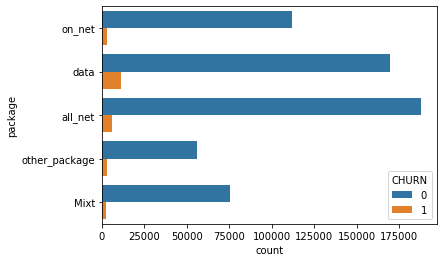

In [39]:
sns.countplot(data=mod_df, y='package', hue='CHURN')

***Inference:*
>from the visalization, although all_net has the highest patronage, comparatively, the data package has the highest churn rate.

### NUMERIC DATA

For the numeric data, each column with missing data amounting to 10% or less wil be replaced with the mean. On the other hand, columns with missing data between 11% or above will be replaced with the mode. 

***Columns to be replaced with the mean***

In [40]:
#Input replace null cells with mean in the Revenue, ARPU_SEGMENT, and Freqency columns
#Revenue
mod_df.REVENUE[np.isnan(mod_df.REVENUE)] = np.nanmean(mod_df.REVENUE, axis=0)

#ARPU_SEGMENT
mod_df.ARPU_SEGMENT[np.isnan(mod_df.ARPU_SEGMENT)] = np.nanmean(mod_df.ARPU_SEGMENT, axis=0)

#Frequency
mod_df.FREQUENCE[np.isnan(mod_df.FREQUENCE)] = np.nanmean(mod_df.FREQUENCE, axis=0)

In [41]:
#MONTANT
mod_df.MONTANT[np.isnan(mod_df.MONTANT)] = np.nanmean(mod_df.MONTANT, axis=0)

#FREQUENCE_RECH
mod_df.FREQUENCE_RECH[np.isnan(mod_df.FREQUENCE_RECH)] = np.nanmean(mod_df.FREQUENCE_RECH, axis=0)

#ON_NET
mod_df.ON_NET[np.isnan(mod_df.ON_NET)] = np.nanmean(mod_df.ON_NET, axis=0)

In [42]:
mod_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 790944 entries, 0 to 1077023
Data columns (total 18 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   user_id         790944 non-null  object 
 1   REGION          790944 non-null  object 
 2   TENURE          790944 non-null  object 
 3   MONTANT         790944 non-null  float64
 4   FREQUENCE_RECH  790944 non-null  float64
 5   REVENUE         790944 non-null  float64
 6   ARPU_SEGMENT    790944 non-null  float64
 7   FREQUENCE       790944 non-null  float64
 8   DATA_VOLUME     527253 non-null  float64
 9   ON_NET          790944 non-null  float64
 10  ORANGE          629247 non-null  float64
 11  MRG             790944 non-null  object 
 12  REGULARITY      790944 non-null  int64  
 13  TOP_PACK        626129 non-null  object 
 14  FREQ_TOP_PACK   626129 non-null  float64
 15  CHURN           790944 non-null  int64  
 16  duration        782686 non-null  object 
 17  package  

***Columns to be replaced with the Mode & 0***

In [43]:
# Replacingt the NaN values in the ORANGE and FREQ_TOP_PACK with the mode
for column in ['ORANGE', 'FREQ_TOP_PACK', 'package', 'duration']:
    mod_df[column].fillna(mod_df[column].mode()[0], inplace=True)

In [44]:
mod_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 790944 entries, 0 to 1077023
Data columns (total 18 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   user_id         790944 non-null  object 
 1   REGION          790944 non-null  object 
 2   TENURE          790944 non-null  object 
 3   MONTANT         790944 non-null  float64
 4   FREQUENCE_RECH  790944 non-null  float64
 5   REVENUE         790944 non-null  float64
 6   ARPU_SEGMENT    790944 non-null  float64
 7   FREQUENCE       790944 non-null  float64
 8   DATA_VOLUME     527253 non-null  float64
 9   ON_NET          790944 non-null  float64
 10  ORANGE          790944 non-null  float64
 11  MRG             790944 non-null  object 
 12  REGULARITY      790944 non-null  int64  
 13  TOP_PACK        626129 non-null  object 
 14  FREQ_TOP_PACK   790944 non-null  float64
 15  CHURN           790944 non-null  int64  
 16  duration        790944 non-null  object 
 17  package  

In [45]:
# Replacing the NaN values in the DATA_VOLUME column with 0
mod_df['DATA_VOLUME'] = mod_df['DATA_VOLUME'].fillna(0)

***Question 3: The lower the topup amount, the higher the churn rate***

In [46]:
topup_churnrates = mod_df.groupby('MONTANT')['CHURN'].mean().reset_index()

<AxesSubplot:xlabel='MONTANT', ylabel='CHURN'>

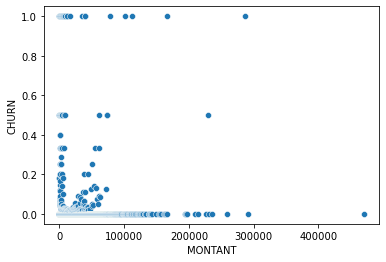

In [47]:
sns.scatterplot(data=topup_churnrates, x='MONTANT', y='CHURN')

***inference***
>The visual suggests that a slight increase in topup amount is likely to result in customers churning. 

***Question 4: Customers who frequently refill up are less likely to churn.***

In [48]:
freqrech_churnrates = mod_df.groupby('FREQUENCE_RECH')['CHURN'].mean().reset_index()

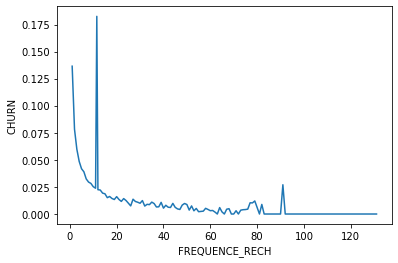

In [49]:
sns.lineplot(data=freqrech_churnrates, x='FREQUENCE_RECH', y='CHURN')
plt.show()

***Inference:***
> From the plot, it is clear that customers who frequently recharge enjoy the service and are less likely to churn.

***Question 5: Revenue higher than the mean customer revene are less liely to churn***

In [50]:
rev_churnrates = mod_df.groupby('REVENUE')['CHURN'].mean().reset_index()

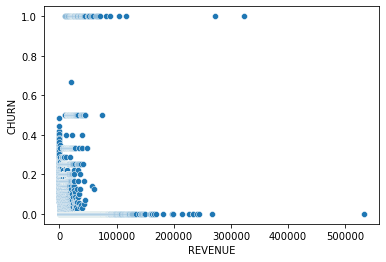

In [51]:
sns.scatterplot(data=rev_churnrates, x='REVENUE', y='CHURN')
plt.show()

***Inference:***
>The higher the monthly income of the customer, the more likely they are to churn.

***Question 6: The higher the number of times a customer makes an income, the less the customer will churn***

In [52]:
freq_churnrates = mod_df.groupby('FREQUENCE')['CHURN'].mean().reset_index()

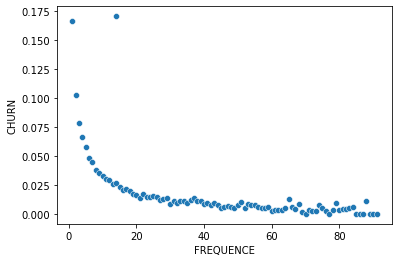

In [53]:
sns.scatterplot(data=freq_churnrates, x='FREQUENCE', y='CHURN')
plt.show()

***Inference:***
>The 6th hypothesis is validated. From the visual, the higher the number of times customers earn an income, the less likely they are going to churn.

In [54]:
mod_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 790944 entries, 0 to 1077023
Data columns (total 18 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   user_id         790944 non-null  object 
 1   REGION          790944 non-null  object 
 2   TENURE          790944 non-null  object 
 3   MONTANT         790944 non-null  float64
 4   FREQUENCE_RECH  790944 non-null  float64
 5   REVENUE         790944 non-null  float64
 6   ARPU_SEGMENT    790944 non-null  float64
 7   FREQUENCE       790944 non-null  float64
 8   DATA_VOLUME     790944 non-null  float64
 9   ON_NET          790944 non-null  float64
 10  ORANGE          790944 non-null  float64
 11  MRG             790944 non-null  object 
 12  REGULARITY      790944 non-null  int64  
 13  TOP_PACK        626129 non-null  object 
 14  FREQ_TOP_PACK   790944 non-null  float64
 15  CHURN           790944 non-null  int64  
 16  duration        790944 non-null  object 
 17  package  

***Question 7: The more customers utilize inter expresso calls the less likely the customer will churn***

In [55]:
onnet_churnrates = mod_df.groupby('ON_NET')['CHURN'].mean().reset_index()

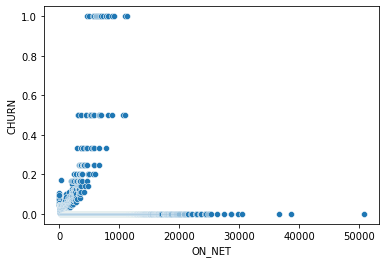

In [56]:
sns.scatterplot(data=onnet_churnrates, x='ON_NET', y='CHURN')
plt.show()

***Question 8: The more calls are placed on Orange the less likely the customer will churn***

In [57]:
orange_churnrates = mod_df.groupby('ORANGE')['CHURN'].mean().reset_index()

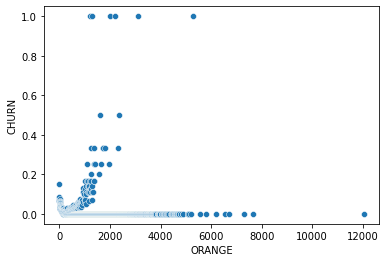

In [58]:
sns.scatterplot(data=orange_churnrates, x='ORANGE', y='CHURN')
plt.show()

***Inference:***
>It can be inferred that the more customers place calls Orange, the less likely they are to churn. Thus, hypothesis 8 is sustained.

***Question 10: The more regular a customer is the less likely he will churn.***


In [59]:
req_churnrates = mod_df.groupby('REGULARITY')['CHURN'].mean().reset_index()

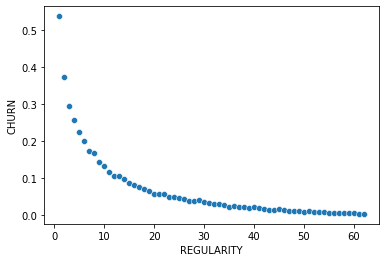

In [60]:
sns.scatterplot(data=req_churnrates, x='REGULARITY', y='CHURN')
plt.show()

***Inference:***
>From the visual, it can be concluded that customers are less likely to churn if they are active for 90 days.

***Question 10: the higher the frequecy_top_package the more likely the customer will churn.***

In [61]:
freqtoppack_churnrates = mod_df.groupby('FREQ_TOP_PACK')['CHURN'].mean().reset_index()

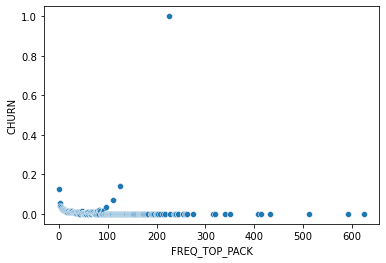

In [62]:
sns.scatterplot(data=freqtoppack_churnrates, x='FREQ_TOP_PACK', y='CHURN')
plt.show()

***Inference:***
>From the visual, the number of times a customers has activated a top up does not affect the customers decision to churn.

***TEST DATA***

In [63]:
#Droping columns with over 45% missing data
test = test_data.drop(columns=["TIGO", "ZONE1", "ZONE2"])

In [64]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 190063 entries, 0 to 190062
Data columns (total 15 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   user_id         190063 non-null  object 
 1   REGION          115330 non-null  object 
 2   TENURE          190063 non-null  object 
 3   MONTANT         123695 non-null  float64
 4   FREQUENCE_RECH  123695 non-null  float64
 5   REVENUE         126422 non-null  float64
 6   ARPU_SEGMENT    126422 non-null  float64
 7   FREQUENCE       126422 non-null  float64
 8   DATA_VOLUME     96716 non-null   float64
 9   ON_NET          120771 non-null  float64
 10  ORANGE          111417 non-null  float64
 11  MRG             190063 non-null  object 
 12  REGULARITY      190063 non-null  int64  
 13  TOP_PACK        110773 non-null  object 
 14  FREQ_TOP_PACK   110773 non-null  float64
dtypes: float64(9), int64(1), object(5)
memory usage: 21.8+ MB


In [65]:
# Delete rows containing either 50% or more than 75% NaN Values
perc = 60.0 # Here N is 75
min_count =  int(((100-perc)/100)*test.shape[1] + 1)
mod_testdf = test.dropna( axis=0, 
                    thresh=min_count)

In [66]:
mod_testdf.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 130617 entries, 0 to 190061
Data columns (total 15 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   user_id         130617 non-null  object 
 1   REGION          102045 non-null  object 
 2   TENURE          130617 non-null  object 
 3   MONTANT         122472 non-null  float64
 4   FREQUENCE_RECH  122472 non-null  float64
 5   REVENUE         126422 non-null  float64
 6   ARPU_SEGMENT    126422 non-null  float64
 7   FREQUENCE       126422 non-null  float64
 8   DATA_VOLUME     87195 non-null   float64
 9   ON_NET          114562 non-null  float64
 10  ORANGE          110991 non-null  float64
 11  MRG             130617 non-null  object 
 12  REGULARITY      130617 non-null  int64  
 13  TOP_PACK        110768 non-null  object 
 14  FREQ_TOP_PACK   110768 non-null  float64
dtypes: float64(9), int64(1), object(5)
memory usage: 15.9+ MB


In [67]:
mod_testdf.isnull().sum() * 100 / len(mod_testdf) #Checking percentage of null values per column

user_id            0.000000
REGION            21.874641
TENURE             0.000000
MONTANT            6.235789
FREQUENCE_RECH     6.235789
REVENUE            3.211680
ARPU_SEGMENT       3.211680
FREQUENCE          3.211680
DATA_VOLUME       33.243758
ON_NET            12.291662
ORANGE            15.025609
MRG                0.000000
REGULARITY         0.000000
TOP_PACK          15.196337
FREQ_TOP_PACK     15.196337
dtype: float64

***Feature: Region***

<AxesSubplot:xlabel='count', ylabel='REGION'>

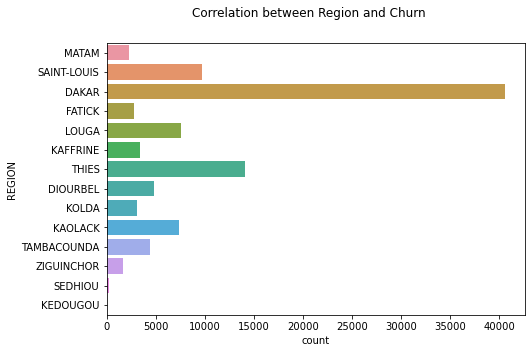

In [68]:
#Plotting the filtered datasets for the Region Column
fig, axes = plt.subplots(figsize=(7.5, 5))
 
fig.suptitle('Correlation between Region and Churn')

sns.countplot(data=mod_testdf, y='REGION')

In [69]:
def fill_na_embarked(mod_testdf, colname): #a function to replace the NaN values with the mode
    
    return mod_testdf[colname].fillna('DAKAR')
    
mod_testdf['REGION'] = fill_na_embarked(mod_testdf, 'REGION')

<AxesSubplot:xlabel='count', ylabel='REGION'>

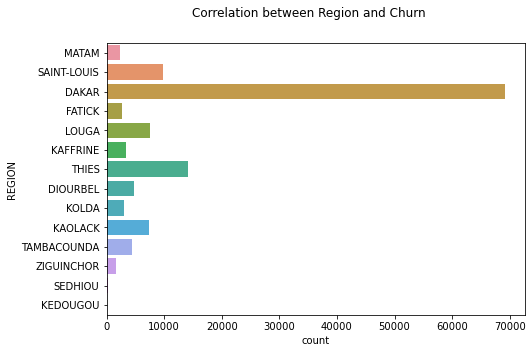

In [70]:
#Plotting the filtered datasets for the Region Column
fig, axes = plt.subplots(figsize=(7.5, 5))
 
fig.suptitle('Correlation between Region and Churn')

sns.countplot(data=mod_testdf, y='REGION')

***Feature: Tenure***

<AxesSubplot:xlabel='count', ylabel='TENURE'>

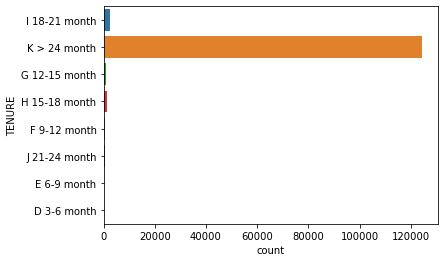

In [71]:
sns.countplot(data=mod_testdf, y='TENURE')

In [72]:
#use the map() to apply the mapping to the Tenure column
mod_testdf['duration'] = mod_testdf['TENURE'].map(mapping)

In [73]:
mod_testdf.head()

,user_id,REGION,TENURE,MONTANT,FREQUENCE_RECH,REVENUE,ARPU_SEGMENT,FREQUENCE,DATA_VOLUME,ON_NET,ORANGE,MRG,REGULARITY,TOP_PACK,FREQ_TOP_PACK,duration
0,51fe4c3347db1f8571d18ac03f716c41acee30a4,MATAM,I 18-21 month,2500.0,5.0,2500.0,833.0,5.0,0.0,64.0,70.0,NO,35,All-net 500F=2000F;5d,5.0,medium_term
4,c7cdf2af01e9fa95bf498b68c122aa4b9a8d10df,SAINT-LOUIS,K > 24 month,5100.0,7.0,5637.0,1879.0,15.0,7783.0,30.0,24.0,NO,60,"Data:1000F=2GB,30d",4.0,long_term
7,e803ce97eee6f699cb39f12cb50e85e66bcd7c9f,DAKAR,K > 24 month,1000.0,1.0,752.0,251.0,4.0,NaN,2.0,4.0,NO,9,All-net 500F=2000F;5d,1.0,long_term
8,9a0fe663d708c4b731e394f7a1f585fd81c9bae3,DAKAR,G 12-15 month,6800.0,4.0,9786.0,3262.0,4.0,15599.0,20.0,18.0,NO,56,"Data:3000F=10GB,30d",3.0,medium_term
9,25d98c9dbf347a9aa829b3e2beec891d1cd797c6,DAKAR,K > 24 month,26000.0,29.0,26499.0,8833.0,35.0,NaN,300.0,180.0,NO,61,All-net 500F=2000F;5d,29.0,long_term


***Feature: MRG***

<AxesSubplot:xlabel='count', ylabel='MRG'>

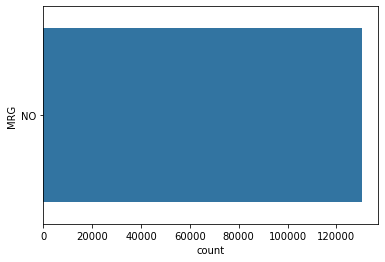

In [74]:
sns.countplot(data=mod_testdf, y='MRG')

***Feature: Top_Pack*** - ***TO BE WORKED ON***

<AxesSubplot:xlabel='count', ylabel='TOP_PACK'>

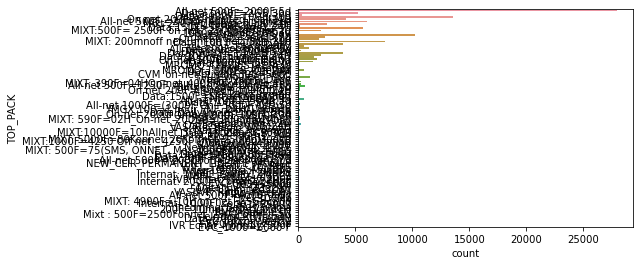

In [75]:
sns.countplot(data=mod_testdf, y='TOP_PACK')

In [76]:
#use the map() to apply the mapping to the Tenure column
mod_testdf['package'] = mod_testdf['TOP_PACK'].map(package_mapping)

# Numeric

In [77]:
#Input replace null cells with mean in the Revenue, ARPU_SEGMENT, and Freqency columns
#Revenue
mod_testdf.REVENUE[np.isnan(mod_testdf.REVENUE)] = np.nanmean(mod_testdf.REVENUE, axis=0)

#ARPU_SEGMENT
mod_testdf.ARPU_SEGMENT[np.isnan(mod_testdf.ARPU_SEGMENT)] = np.nanmean(mod_testdf.ARPU_SEGMENT, axis=0)

#Frequency
mod_testdf.FREQUENCE[np.isnan(mod_testdf.FREQUENCE)] = np.nanmean(mod_df.FREQUENCE, axis=0)

In [78]:
#MONTANT
mod_testdf.MONTANT[np.isnan(mod_testdf.MONTANT)] = np.nanmean(mod_testdf.MONTANT, axis=0)

#FREQUENCE_RECH
mod_testdf.FREQUENCE_RECH[np.isnan(mod_testdf.FREQUENCE_RECH)] = np.nanmean(mod_testdf.FREQUENCE_RECH, axis=0)

#ON_NET
mod_testdf.ON_NET[np.isnan(mod_testdf.ON_NET)] = np.nanmean(mod_testdf.ON_NET, axis=0)

***Columns to be replaced with the Mode & 0***

In [79]:
# Replacingt the NaN values in the ORANGE and FREQ_TOP_PACK with the mode
for column in ['ORANGE', 'FREQ_TOP_PACK']:
    mod_testdf[column].fillna(mod_testdf[column].mode()[0], inplace=True)

In [80]:
# Replacingt the NaN values in the package and duration with the mode
for column in ['package', 'duration']:
    mod_testdf[column].fillna(mod_testdf[column].mode()[0], inplace=True)

In [81]:
# Replacing the NaN values in the DATA_VOLUME column with 0
mod_testdf['DATA_VOLUME'] = mod_testdf['DATA_VOLUME'].fillna(0)

In [82]:
mod_testdf.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 130617 entries, 0 to 190061
Data columns (total 17 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   user_id         130617 non-null  object 
 1   REGION          130617 non-null  object 
 2   TENURE          130617 non-null  object 
 3   MONTANT         130617 non-null  float64
 4   FREQUENCE_RECH  130617 non-null  float64
 5   REVENUE         130617 non-null  float64
 6   ARPU_SEGMENT    130617 non-null  float64
 7   FREQUENCE       130617 non-null  float64
 8   DATA_VOLUME     130617 non-null  float64
 9   ON_NET          130617 non-null  float64
 10  ORANGE          130617 non-null  float64
 11  MRG             130617 non-null  object 
 12  REGULARITY      130617 non-null  int64  
 13  TOP_PACK        110768 non-null  object 
 14  FREQ_TOP_PACK   130617 non-null  float64
 15  duration        130617 non-null  object 
 16  package         130617 non-null  object 
dtypes: float64

# 4. Modeling

In [83]:
mod_df.head()

,user_id,REGION,TENURE,MONTANT,FREQUENCE_RECH,REVENUE,ARPU_SEGMENT,FREQUENCE,DATA_VOLUME,ON_NET,ORANGE,MRG,REGULARITY,TOP_PACK,FREQ_TOP_PACK,CHURN,duration,package
0,7ee9e11e342e27c70455960acc80d3f91c1286d1,DAKAR,K > 24 month,20000.0,47.0,21602.0,7201.0,52.0,8835.0,3391.000000,396.0,NO,62,On net 200F=Unlimited _call24H,30.0,0,long_term,on_net
3,364ec1b424cdc64c25441a444a16930289a0051e,SAINT-LOUIS,K > 24 month,7900.0,19.0,7896.0,2632.0,25.0,9385.0,27.000000,46.0,NO,61,"Data:490F=1GB,7d",7.0,0,long_term,data
4,d5a5247005bc6d41d3d99f4ef312ebb5f640f2cb,DAKAR,K > 24 month,12350.0,21.0,12351.0,4117.0,29.0,9360.0,66.000000,102.0,NO,56,All-net 500F=2000F;5d,11.0,0,long_term,all_net
5,b91a81e590d0dd029d99002d4226b9ca2cdf3cbc,DAKAR,E 6-9 month,2000.0,2.0,2000.0,667.0,3.0,4206.0,246.000000,709.0,NO,62,"On-net 500=4000,10d",1.0,0,short_term,on_net
6,42335a2a6a2a4cd30452ce9bc611bd66b3a9d4c2,DAKAR,K > 24 month,3000.0,1.0,3000.0,1000.0,1.0,0.0,280.646663,1.0,NO,6,"Data:3000F=10GB,30d",1.0,0,long_term,data


In [84]:

#Import Models
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import LinearSVC, SVC

In [85]:
# Metrics
from sklearn import metrics
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.model_selection import KFold, cross_val_score
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, plot_confusion_matrix, precision_score, recall_score, f1_score, cohen_kappa_score
from sklearn.metrics import auc, roc_curve, roc_auc_score, precision_recall_curve
from sklearn.preprocessing import MinMaxScaler

***Model Evaluation***
>create a funtion that evaluates the model for its accuracy score, precision score, recall score, f1 score and cohen kappa score

In [86]:
def evaluate_model(model, x_test, y_test):
    from sklearn import metrics

    # Predict Test Data 
    y_pred = model.predict(x_test)

    # Calculate accuracy, precision, recall, f1-score, and kappa score
    acc = metrics.accuracy_score(y_test, y_pred)
    prec = metrics.precision_score(y_test, y_pred)
    #rec = metrics.recall_score(y_test, y_pred)
    #f1 = metrics.f1_score(y_test, y_pred)
    #kappa = metrics.cohen_kappa_score(y_test, y_pred)

    # Calculate area under curve (AUC)
    y_pred_proba = model.predict_proba(x_test)[::,1]
    fpr, tpr, _ = metrics.roc_curve(y_test, y_pred_proba)
    auc = metrics.roc_auc_score(y_test, y_pred_proba)

    # Display confussion matrix
    cm = metrics.confusion_matrix(y_test, y_pred)

    return {'acc': acc, 'prec': prec, 'fpr': fpr, 'tpr': tpr, 'auc': auc, 'cm': cm}

***TRAIN DATA***

In [87]:
mod_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 790944 entries, 0 to 1077023
Data columns (total 18 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   user_id         790944 non-null  object 
 1   REGION          790944 non-null  object 
 2   TENURE          790944 non-null  object 
 3   MONTANT         790944 non-null  float64
 4   FREQUENCE_RECH  790944 non-null  float64
 5   REVENUE         790944 non-null  float64
 6   ARPU_SEGMENT    790944 non-null  float64
 7   FREQUENCE       790944 non-null  float64
 8   DATA_VOLUME     790944 non-null  float64
 9   ON_NET          790944 non-null  float64
 10  ORANGE          790944 non-null  float64
 11  MRG             790944 non-null  object 
 12  REGULARITY      790944 non-null  int64  
 13  TOP_PACK        626129 non-null  object 
 14  FREQ_TOP_PACK   790944 non-null  float64
 15  CHURN           790944 non-null  int64  
 16  duration        790944 non-null  object 
 17  package  

In [88]:
#Generating dummies(onehot_ecode) for columns in our dataframe without bianary values.
columnsB=['REGION','TENURE','MRG', 'duration', 'package']

mod_df = pd.get_dummies(mod_df, columns=columnsB)

In [89]:
mod_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 790944 entries, 0 to 1077023
Data columns (total 44 columns):
 #   Column                 Non-Null Count   Dtype  
---  ------                 --------------   -----  
 0   user_id                790944 non-null  object 
 1   MONTANT                790944 non-null  float64
 2   FREQUENCE_RECH         790944 non-null  float64
 3   REVENUE                790944 non-null  float64
 4   ARPU_SEGMENT           790944 non-null  float64
 5   FREQUENCE              790944 non-null  float64
 6   DATA_VOLUME            790944 non-null  float64
 7   ON_NET                 790944 non-null  float64
 8   ORANGE                 790944 non-null  float64
 9   REGULARITY             790944 non-null  int64  
 10  TOP_PACK               626129 non-null  object 
 11  FREQ_TOP_PACK          790944 non-null  float64
 12  CHURN                  790944 non-null  int64  
 13  REGION_DAKAR           790944 non-null  uint8  
 14  REGION_DIOURBEL        790944 non-n

In [90]:
mod_df = mod_df.drop(columns=["user_id", "TOP_PACK", "REGION_DIOURBEL", "REGION_FATICK", "REGION_KAFFRINE", "REGION_KAOLACK","REGION_KEDOUGOU", "REGION_KOLDA", "REGION_LOUGA",
"REGION_MATAM", "REGION_SAINT-LOUIS", "REGION_SEDHIOU", "REGION_TAMBACOUNDA", "REGION_THIES", "REGION_ZIGUINCHOR", "TENURE_D 3-6 month",
"TENURE_E 6-9 month", "TENURE_F 9-12 month", "TENURE_G 12-15 month", "TENURE_H 15-18 month", "TENURE_I 18-21 month", "TENURE_J 21-24 month",
"TENURE_K > 24 month"])

In [91]:
#Checking for the percentage of missing values in our data set meant for modelling
round(100*(mod_df.isnull().sum()/len(mod_df.index)), 2)

MONTANT                  0.0
FREQUENCE_RECH           0.0
REVENUE                  0.0
ARPU_SEGMENT             0.0
FREQUENCE                0.0
DATA_VOLUME              0.0
ON_NET                   0.0
ORANGE                   0.0
REGULARITY               0.0
FREQ_TOP_PACK            0.0
CHURN                    0.0
REGION_DAKAR             0.0
MRG_NO                   0.0
duration_long_term       0.0
duration_medium_term     0.0
duration_short_term      0.0
package_Mixt             0.0
package_all_net          0.0
package_data             0.0
package_on_net           0.0
package_other_package    0.0
dtype: float64

***TEST DATA***

In [92]:
test_df = mod_testdf

In [93]:
test_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 130617 entries, 0 to 190061
Data columns (total 17 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   user_id         130617 non-null  object 
 1   REGION          130617 non-null  object 
 2   TENURE          130617 non-null  object 
 3   MONTANT         130617 non-null  float64
 4   FREQUENCE_RECH  130617 non-null  float64
 5   REVENUE         130617 non-null  float64
 6   ARPU_SEGMENT    130617 non-null  float64
 7   FREQUENCE       130617 non-null  float64
 8   DATA_VOLUME     130617 non-null  float64
 9   ON_NET          130617 non-null  float64
 10  ORANGE          130617 non-null  float64
 11  MRG             130617 non-null  object 
 12  REGULARITY      130617 non-null  int64  
 13  TOP_PACK        110768 non-null  object 
 14  FREQ_TOP_PACK   130617 non-null  float64
 15  duration        130617 non-null  object 
 16  package         130617 non-null  object 
dtypes: float64

In [94]:
#Generating dummies(onehot_ecode) for columns in our dataframe without bianary values.
columnsB=['REGION','TENURE','MRG', 'duration', 'package']

test_df = pd.get_dummies(test_df, columns=columnsB)

In [95]:
test_df = test_df.drop(columns=["user_id", "TOP_PACK", "REGION_DIOURBEL", "REGION_FATICK", "REGION_KAFFRINE", "REGION_KAOLACK","REGION_KEDOUGOU", "REGION_KOLDA", "REGION_LOUGA",
"REGION_MATAM", "REGION_SAINT-LOUIS", "REGION_SEDHIOU", "REGION_TAMBACOUNDA", "REGION_THIES", "REGION_ZIGUINCHOR", "TENURE_D 3-6 month",
"TENURE_E 6-9 month", "TENURE_F 9-12 month", "TENURE_G 12-15 month", "TENURE_H 15-18 month", "TENURE_I 18-21 month", "TENURE_J 21-24 month",
"TENURE_K > 24 month"])

In [96]:
#Checking for the percentage of missing values in our data set meant for modelling
round(100*(test_df.isnull().sum()/len(test_df.index)), 2)

MONTANT                  0.0
FREQUENCE_RECH           0.0
REVENUE                  0.0
ARPU_SEGMENT             0.0
FREQUENCE                0.0
DATA_VOLUME              0.0
ON_NET                   0.0
ORANGE                   0.0
REGULARITY               0.0
FREQ_TOP_PACK            0.0
REGION_DAKAR             0.0
MRG_NO                   0.0
duration_long_term       0.0
duration_medium_term     0.0
duration_short_term      0.0
package_Mixt             0.0
package_all_net          0.0
package_data             0.0
package_on_net           0.0
package_other_package    0.0
dtype: float64

In [97]:
test_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 130617 entries, 0 to 190061
Data columns (total 20 columns):
 #   Column                 Non-Null Count   Dtype  
---  ------                 --------------   -----  
 0   MONTANT                130617 non-null  float64
 1   FREQUENCE_RECH         130617 non-null  float64
 2   REVENUE                130617 non-null  float64
 3   ARPU_SEGMENT           130617 non-null  float64
 4   FREQUENCE              130617 non-null  float64
 5   DATA_VOLUME            130617 non-null  float64
 6   ON_NET                 130617 non-null  float64
 7   ORANGE                 130617 non-null  float64
 8   REGULARITY             130617 non-null  int64  
 9   FREQ_TOP_PACK          130617 non-null  float64
 10  REGION_DAKAR           130617 non-null  uint8  
 11  MRG_NO                 130617 non-null  uint8  
 12  duration_long_term     130617 non-null  uint8  
 13  duration_medium_term   130617 non-null  uint8  
 14  duration_short_term    130617 non-nu

***Split the Data and Verify data behavior***

In [98]:
# Features and YLabel
Xfeatures = mod_df.drop(["CHURN"], axis=1)
ylabels = mod_df['CHURN']

In [99]:
#split the Dataset
x_train,x_test,ytrain,y_test = train_test_split(Xfeatures, ylabels, test_size=.2, random_state=42)

<AxesSubplot:>

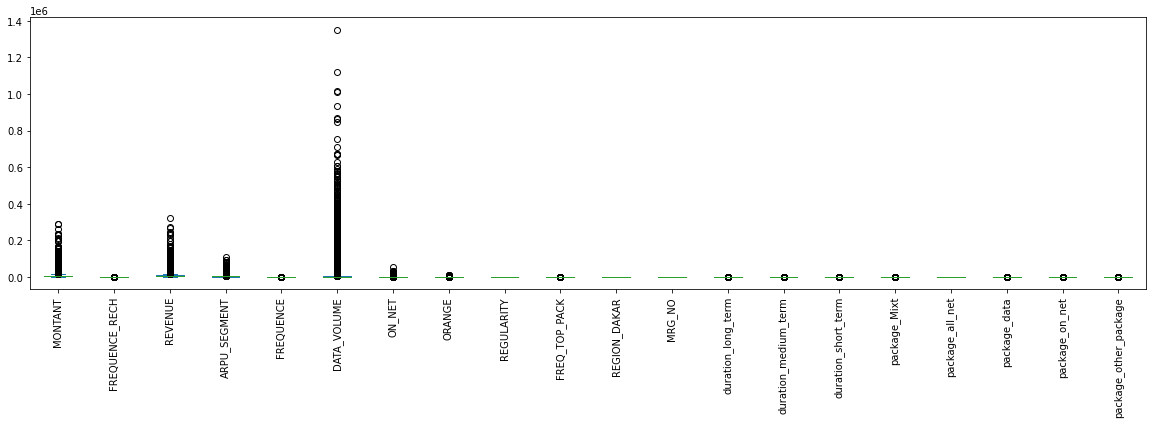

In [100]:
x_train.plot.box(figsize=(20,5), rot=90)

<AxesSubplot:>

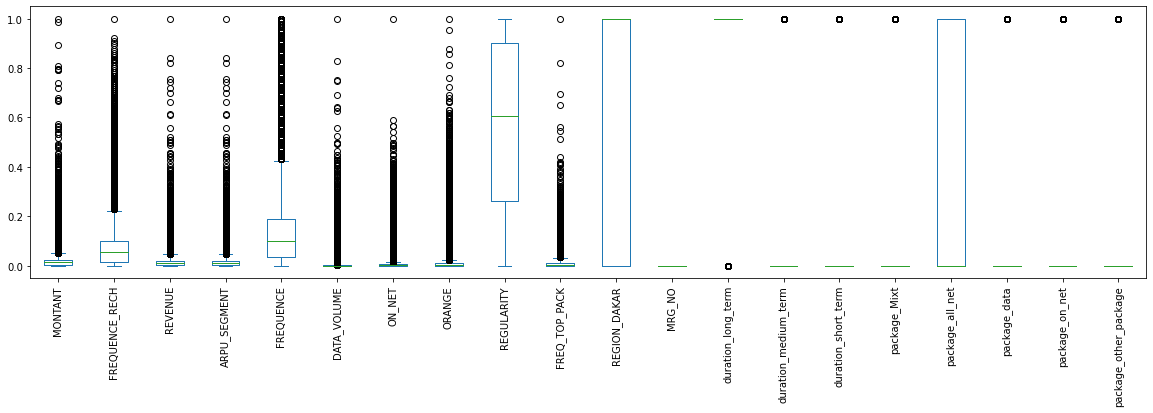

In [101]:
from sklearn.preprocessing import MinMaxScaler
norm = MinMaxScaler().fit(x_train)
X_train_norm = norm.transform(x_train)
X_test_norm = norm.transform(x_test)
pd.DataFrame(X_train_norm, columns=x_train.columns).plot.box(figsize=(20,5), rot=90)

***Standadizing the data***

<AxesSubplot:>

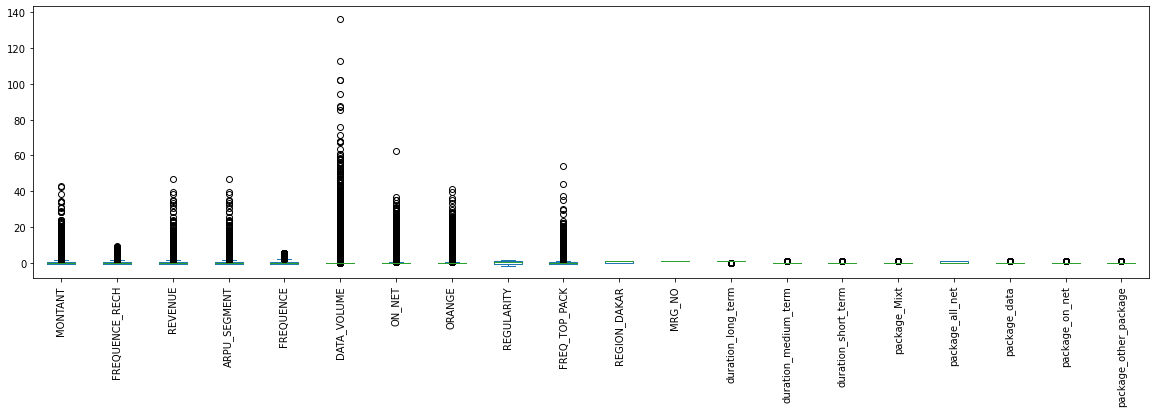

In [102]:
#standadizing the data
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
x_train[["MONTANT", "FREQUENCE_RECH", "REVENUE", "ARPU_SEGMENT", "FREQUENCE", "DATA_VOLUME", "ON_NET", "ORANGE", "REGULARITY", "FREQ_TOP_PACK" ]] = scaler.fit_transform(x_train[["MONTANT", "FREQUENCE_RECH", "REVENUE", "ARPU_SEGMENT", "FREQUENCE", "DATA_VOLUME", "ON_NET", "ORANGE", "REGULARITY", "FREQ_TOP_PACK" ]])
x_test[["MONTANT", "FREQUENCE_RECH", "REVENUE", "ARPU_SEGMENT", "FREQUENCE", "DATA_VOLUME", "ON_NET", "ORANGE", "REGULARITY", "FREQ_TOP_PACK" ]] = scaler.fit_transform(x_test[["MONTANT", "FREQUENCE_RECH", "REVENUE", "ARPU_SEGMENT", "FREQUENCE", "DATA_VOLUME", "ON_NET", "ORANGE", "REGULARITY", "FREQ_TOP_PACK" ]])

#plot scales x_train data
pd.DataFrame(x_train, columns=x_train.columns).plot.box(figsize=(20,5), rot=90)

### Checking for Correlation
>Here, I wanted to ascertain those variables that are highligh correlated so that I can remove them before building the various models and comparing them

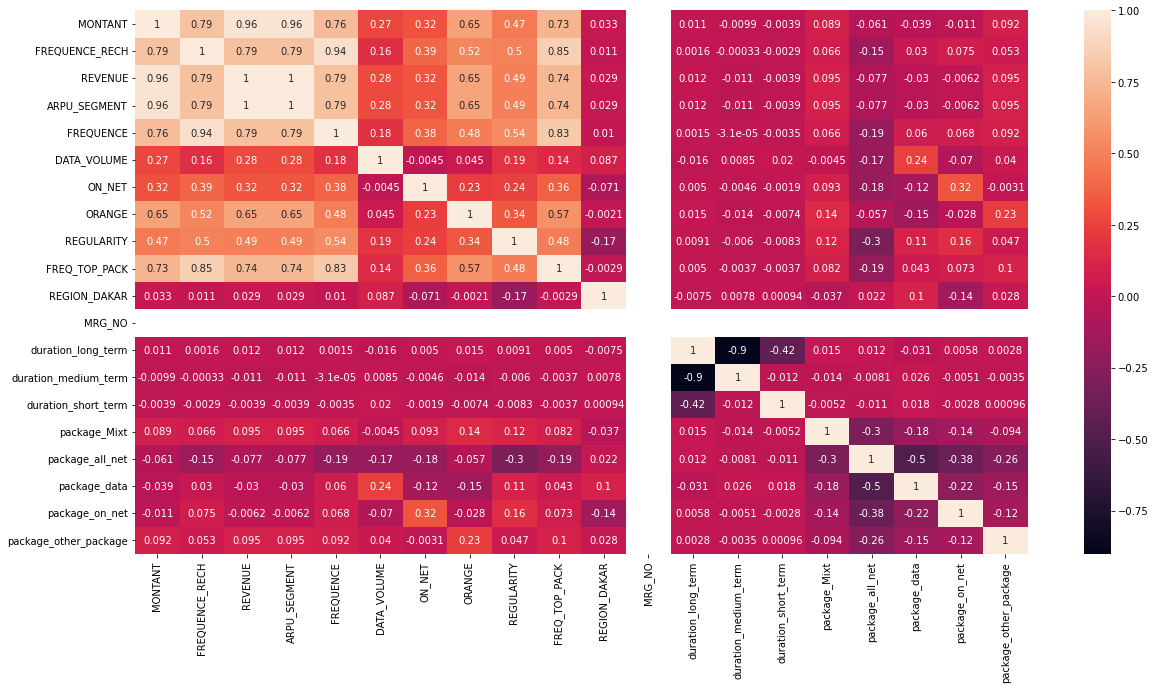

In [103]:
plt.figure(figsize = (20,10))
sns.heatmap(x_train.corr(), annot = True)
plt.show()

***Logistics Regression Model***

In [104]:
lr_model = LogisticRegression()
lr_model.fit(x_train, ytrain)

LogisticRegression()

In [105]:
# Evaluate Model
lrm_evl = evaluate_model(lr_model, x_test, y_test)

In [107]:
# Print result
print('Accuracy:', lrm_evl['acc'])
print('Precision:', lrm_evl['prec'])
#print('Recall:', lrm_evl['rec'])
#print('F1 Score:', lrm_evl['f1'])
#print('Cohens Kappa Score:', lrm_evl['kappa'])
print('Area Under Curve:', lrm_evl['auc'])
print('Confusion Matrix:\n', lrm_evl['cm'])

Accuracy: 0.9352673068291727
Precision: 0.4962962962962963
Area Under Curve: 0.8920975584510267
Confusion Matrix:
 [[147882     68]
 [ 10172     67]]


***Decesion Tree***

In [108]:
# Building Decision Tree model 
dtc = DecisionTreeClassifier(random_state=0)
dtc.fit(x_train, ytrain)

DecisionTreeClassifier(random_state=0)

In [109]:
# Evaluate Model
dtc_evl = evaluate_model(dtc, x_test, y_test)

In [110]:
# Print result
print('Accuracy:', dtc_evl['acc'])
print('Precision:', dtc_evl['prec'])
#print('Recall:', dtc_evl['rec'])
#print('F1 Score:', dtc_evl['f1'])
#print('Cohens Kappa Score:', dtc_evl['kappa'])
print('Area Under Curve:', dtc_evl['auc'])
print('Confusion Matrix:\n', dtc_evl['cm'])

Accuracy: 0.8943605434006158
Precision: 0.23844164241836405
Area Under Curve: 0.6144196168484343
Confusion Matrix:
 [[138528   9422]
 [  7289   2950]]


***Random Forest***

In [111]:
# Building Random Forest model 
rfm = RandomForestClassifier(random_state=0)
rfm.fit(x_train, ytrain)

RandomForestClassifier(random_state=0)

In [112]:
#Evaluate Random Forest Model
rfm_evl = evaluate_model(rfm, x_test, y_test)

In [114]:
# Print result
print('Accuracy:', rfm_evl['acc'])
print('Precision:', rfm_evl['prec'])
#print('Recall:', rfm_evl['rec'])
#print('F1 Score:', rfm_evl['f1'])
#print('Cohens Kappa Score:', rfm_evl['kappa'])
print('Area Under Curve:', rfm_evl['auc'])
print('Confusion Matrix:\n', rfm_evl['cm'])

Accuracy: 0.9351788051002282
Precision: 0.49676025917926564
Area Under Curve: 0.8828505177755528
Confusion Matrix:
 [[146785   1165]
 [  9089   1150]]


***Naive Baynes***

In [115]:
# Building Naive Baynes Model 
nbm = GaussianNB()
nbm.fit(x_train, ytrain)

GaussianNB()

In [116]:
#Evaluate Naive Baynes Model
nbm_evl = evaluate_model(nbm, x_test, y_test)

In [118]:
# Print result
print('Accuracy:', nbm_evl['acc'])
print('Precision:', nbm_evl['prec'])
#print('Recall:', nbm_evl['rec'])
#print('F1 Score:', nbm_evl['f1'])
#print('Cohens Kappa Score:', nbm_evl['kappa'])
print('Area Under Curve:', nbm_evl['auc'])
print('Confusion Matrix:\n', nbm_evl['cm'])

Accuracy: 0.6982091042992875
Precision: 0.15892678490222828
Area Under Curve: 0.8302793545185906
Confusion Matrix:
 [[101712  46238]
 [  1502   8737]]


# Model Comparison

> Having built all our models, they will all be compared with each other to determine their performance using two different charts.
>>the first chart will be a grouped bar chart displaying their accuracy, precision, recall, f1, and kappa score.\
>>the second would be a group line chart depicting thier AUC of all the model

***grouped bar chart with accuracy, precision, recall, f1 and lappa scores for each model***

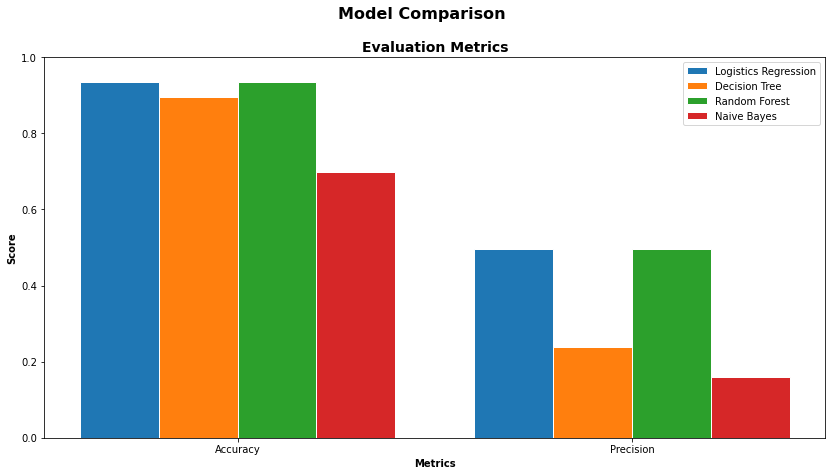

In [119]:
# Intitialize figure with plot
fig, ax1 = plt.subplots()
fig.suptitle('Model Comparison', fontsize=16, fontweight='bold')
fig.set_figheight(7)
fig.set_figwidth(14)
fig.set_facecolor('white')

# First plot
## set bar size
barWidth = 0.2
lrm_score = [lrm_evl['acc'], lrm_evl['prec']] #, lrm_evl['rec'], lrm_evl['f1'], lrm_evl['kappa']]
dtc_score = [dtc_evl['acc'], dtc_evl['prec']] #, dtc_evl['rec'], dtc_evl['f1'], dtc_evl['kappa']]
rfm_score = [rfm_evl['acc'], rfm_evl['prec']] #, rfm_evl['rec'], rfm_evl['f1'], rfm_evl['kappa']]
nbm_score = [nbm_evl['acc'], nbm_evl['prec']] #, nbm_evl['rec'], nbm_evl['f1'], nbm_evl['kappa']]
#knn_score = [knn_evl['acc'], knn_evl['prec']] #, knn_evl['rec'], knn_evl['f1'], knn_evl['kappa']]

## Set position of bar on X axis
r1 = np.arange(len(dtc_score))
r2 = [x + barWidth for x in r1]
r3 = [x + barWidth for x in r2]
r4 = [x + barWidth for x in r3]
#r5 = [x + barWidth for x in r4]

## Make the plot
ax1.bar(r1, lrm_score, width=barWidth, edgecolor='white', label='Logistics Regression')
ax1.bar(r2, dtc_score, width=barWidth, edgecolor='white', label='Decision Tree')
ax1.bar(r3, rfm_score, width=barWidth, edgecolor='white', label='Random Forest')
ax1.bar(r4, nbm_score, width=barWidth, edgecolor='white', label='Naive Bayes')
#ax1.bar(r5, knn_score, width=barWidth, edgecolor='white', label='K-Nearest Neighbors')

## Configure x and y axis
ax1.set_xlabel('Metrics', fontweight='bold')
labels = ['Accuracy', 'Precision'] #, 'Recall', 'F1', 'Kappa']
ax1.set_xticks([r + (barWidth * 1.5) for r in range(len(lrm_score))], )
ax1.set_xticklabels(labels)
ax1.set_ylabel('Score', fontweight='bold')
ax1.set_ylim(0, 1)

## Create legend & title
ax1.set_title('Evaluation Metrics', fontsize=14, fontweight='bold')
ax1.legend()

***Grouped Line chart with the AUC of all Models***

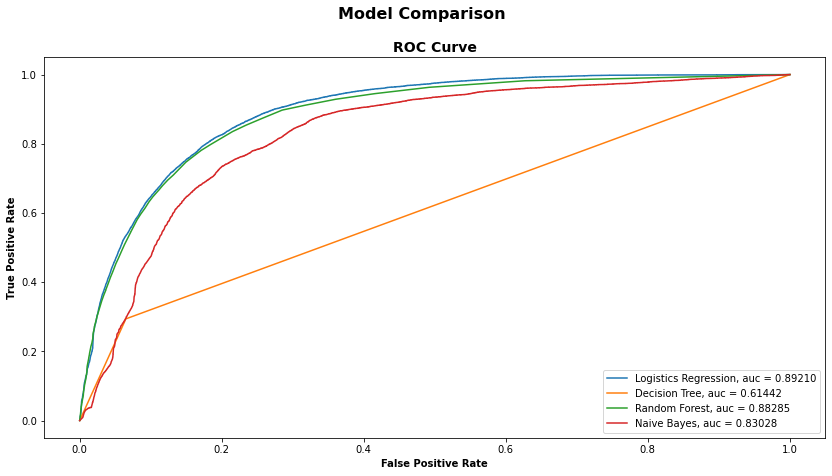

In [120]:
# Initialize Second plot
fig, ax2 = plt.subplots()
fig.suptitle('Model Comparison', fontsize=16, fontweight='bold')
fig.set_figheight(7)
fig.set_figwidth(14)
fig.set_facecolor('white')

## Comparing ROC Curve
ax2.plot(lrm_evl['fpr'], lrm_evl['tpr'], label='Logistics Regression, auc = {:0.5f}'.format(lrm_evl['auc']))
ax2.plot(dtc_evl['fpr'], dtc_evl['tpr'], label='Decision Tree, auc = {:0.5f}'.format(dtc_evl['auc']))
ax2.plot(rfm_evl['fpr'], rfm_evl['tpr'], label='Random Forest, auc = {:0.5f}'.format(rfm_evl['auc']))
ax2.plot(nbm_evl['fpr'], nbm_evl['tpr'], label='Naive Bayes, auc = {:0.5f}'.format(nbm_evl['auc']))
#ax2.plot(knn_evl['fpr'], knn_evl['tpr'], label='K-Nearest Nieghbor, auc = {:0.5f}'.format(knn_evl['auc']))

## Configure x and y axis
ax2.set_xlabel('False Positive Rate', fontweight='bold')
ax2.set_ylabel('True Positive Rate', fontweight='bold')

## Create legend & title
ax2.set_title('ROC Curve', fontsize=14, fontweight='bold')
ax2.legend(loc=4)

plt.show()

***Inference:***
>from these charts, it is evident that the Logistics Regression Model is the most appropriate model for prediction\
    given it excels in 2 out of the 3 criteria. It is therefore assumed that the Logistics regression would solve our problem and help with the prediction.

# Hyper Parameter Tuning

***The Logistics Regression Model will be optimised by tuning the hyper parameters available using the scikit-learn library.*** 

***_Steps:_***
1. Identify the optimal parameters
2. Compare the new model with our baseline model to evaluate it

In [121]:
from sklearn.model_selection import GridSearchCV

In [122]:
# Creating the hyperparameter grid
c_space = np.logspace(-5, 8, 15)
param_grid = {'C': c_space}
 
# Instantiating logistic regression classifier
logreg = LogisticRegression()
 
# Instantiating the GridSearchCV object
logreg_cv = GridSearchCV(logreg, param_grid, cv = 5)
 


In [123]:
logreg_cv.fit(x_train, ytrain)

GridSearchCV(cv=5, estimator=LogisticRegression(),
             param_grid={'C': array([1.00000000e-05, 8.48342898e-05, 7.19685673e-04, 6.10540230e-03,
       5.17947468e-02, 4.39397056e-01, 3.72759372e+00, 3.16227766e+01,
       2.68269580e+02, 2.27584593e+03, 1.93069773e+04, 1.63789371e+05,
       1.38949549e+06, 1.17876863e+07, 1.00000000e+08])})

In [124]:
# Print the tuned parameters and score
print("Tuned Logistic Regression Parameters: {}".format(logreg_cv.best_params_))
print("Best score is {}".format(logreg_cv.best_score_))

Tuned Logistic Regression Parameters: {'C': 0.4393970560760795}
Best score is 0.934243111472845


# 5. Evaluation.

>1. Access the best_estimator_ attribute of the GridSearchCV  and save our optimised model into "best_grid."\
>2. Use the 3 evaluation metrics using the helper function.\
>3. Compare it with our base model 

In [125]:
#Stept One: Accessing the best_estimator_ attribute of the GridSearchCV and save our optimised model into "best_grid."\
# Select best model with best fit
opt_logreg = logreg_cv.best_estimator_

In [126]:
# Step Two: Use the 6 evaluation metrics using the helper function.\
best_grid_eval = evaluate_model(opt_logreg, x_test, y_test)

In [127]:
# Print result
print('Accuracy:', best_grid_eval['acc'])
print('Precision:', best_grid_eval['prec'])
print('Area Under Curve:', best_grid_eval['auc'])
print('Confusion Matrix:\n', best_grid_eval['cm'])

Accuracy: 0.9352673068291727
Precision: 0.4962962962962963
Area Under Curve: 0.8920956242789556
Confusion Matrix:
 [[147882     68]
 [ 10172     67]]


***Step Three: Model Comparison:***

> We will compare the optimized model with the base model using the:\
>>1. Grouped bar chart with accuracy, precision, recall, f1 and lappa scores for both models\
>>2. Grouped Line chart with the AUC of the two models

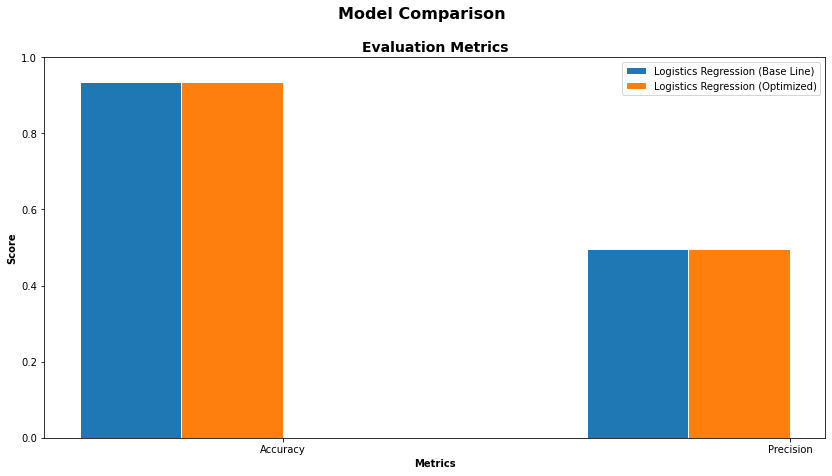

In [128]:
#Grouped bar chart with accuracy, precision, recall, f1 and lappa scores for both models

# Intitialize figure with plot
fig, ax1 = plt.subplots()
fig.suptitle('Model Comparison', fontsize=16, fontweight='bold')
fig.set_figheight(7)
fig.set_figwidth(14)
fig.set_facecolor('white')

# First plot
## set bar size
barWidth = 0.2
lrm_score = [lrm_evl['acc'], lrm_evl['prec']] #lrm_evl2['rec'], lrm_evl2['f1'], lrm_evl2['kappa']]
bestgrid_score = [best_grid_eval['acc'], best_grid_eval['prec']] #best_grid_eval['rec'], best_grid_eval['f1'], best_grid_eval['kappa']]


## Set position of bar on X axis
r1 = np.arange(len(dtc_score))
r2 = [x + barWidth for x in r1]


## Make the plot
ax1.bar(r1, lrm_score, width=barWidth, edgecolor='white', label='Logistics Regression (Base Line)')
ax1.bar(r2, bestgrid_score, width=barWidth, edgecolor='white', label = 'Logistics Regression (Optimized)')


## Configure x and y axis
ax1.set_xlabel('Metrics', fontweight='bold')
labels = ['Accuracy', 'Precision'] #, 'Recall', 'F1', 'Kappa']
ax1.set_xticks([r + (barWidth * 1.5) for r in range(len(lrm_score))], )
ax1.set_xticklabels(labels)
ax1.set_ylabel('Score', fontweight='bold')
ax1.set_ylim(0, 1)

## Create legend & title
ax1.set_title('Evaluation Metrics', fontsize=14, fontweight='bold')
ax1.legend()

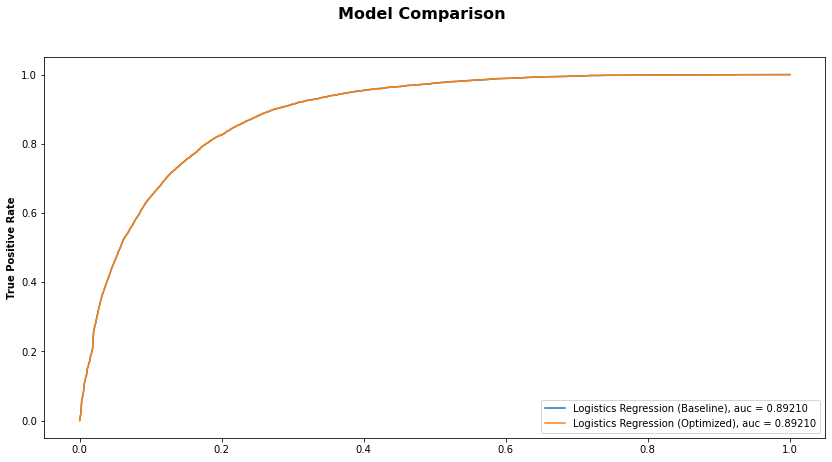

Change of 0.00% on accuracy.
Change of 0.00% on precision.
Change of -0.00% on AUC.


In [130]:
# Initialize Second plot
fig, ax2 = plt.subplots()
fig.suptitle('Model Comparison', fontsize=16, fontweight='bold')
fig.set_figheight(7)
fig.set_figwidth(14)
fig.set_facecolor('white')

## Comparing ROC Curve
ax2.plot(lrm_evl['fpr'], lrm_evl['tpr'], label ='Logistics Regression (Baseline), auc = {:0.5f}'.format(lrm_evl['auc']))
ax2.plot(best_grid_eval['fpr'], best_grid_eval['tpr'], label ='Logistics Regression (Optimized), auc = {:0.5f}'.format(best_grid_eval['auc']))

## Configure x and y axis
ax1.set_xlabel('False Positive Rate', fontweight='bold')
ax2.set_ylabel('True Positive Rate', fontweight='bold')

## Create legend & title
ax1.set_title('ROC Curve', fontsize=14, fontweight='bold')
ax2.legend(loc=4)

plt.show()
print('Change of {:0.2f}% on accuracy.'.format(100 * ((best_grid_eval['acc'] - lrm_evl['acc']) / lrm_evl['acc'])))
print('Change of {:0.2f}% on precision.'.format(100 * ((best_grid_eval['prec'] - lrm_evl['prec']) / lrm_evl['prec'])))
#print('Change of {:0.2f}% on recall.'.format(100 * ((best_grid_eval['rec'] - lrm_evl['rec']) / lrm_evl['rec'])))
#print('Change of {:0.2f}% on F1 score.'.format(100 * ((best_grid_eval['f1'] - lrm_evl['f1']) / lrm_evl['f1'])))
#print('Change of {:0.2f}% on Kappa score.'.format(100 * ((best_grid_eval['kappa'] - lrm_evl['kappa']) / lrm_evl['kappa'])))
print('Change of {:0.2f}% on AUC.'.format(100 * ((best_grid_eval['auc'] - lrm_evl['auc']) / lrm_evl['auc'])))

***Inference:***
    >The baseline model has the same values as the optimized model.

In [131]:
pred = lr_model.predict(x_test)

In [132]:
print("Accuracy for Logistics Regression Model on CV data: ",accuracy_score(y_test, pred))

Accuracy for Logistics Regression Model on CV data:  0.9352673068291727


In [136]:
pred = pd.DataFrame(pred, columns=['CHURN_PREDICTION'])#ccreate a dataframe for the prediction.

In [138]:
prediction = pd.concat([mod_testdf.user_id, pred], axis=1)#combine prediction with the the column from the mod_testdf into 1 df

In [140]:
prediction.set_index('user_id', inplace=True)#set user_id as the index

In [141]:
prediction.to_csv(f"submission_file_March-2023.csv") #Make csv of above dataframe sub => sub.to_csv(f"Submission_file_oct-2021.csv")

In [ ]:
convert it to dataframe => pred = pd.DataFrame(pred,columns=[column_name_in_submission_sample]).
take id column from test_data(given test.csv) and concat with pred =>
sub = pd.concat([test_data.id,pred],axis=1).
Set id as index => sub.set_index('id',inplace=True).
Make csv of above dataframe sub => sub.to_csv(f"Submission_file_oct-2021.csv")

In [220]:
#Save new dataframe into csv file
Prediction.to_csv('Customer Churn Prediction.csv', index=True)

### Selecting the Top 10 variables for our logistics regression model
>Here, the top 10 significant variables to our model would be selected and used in developing our LR model

In [142]:
from sklearn.feature_selection import RFE
rfe = RFE(lr_model)
rfe = rfe.fit(x_train, ytrain)

In [143]:
list(zip(x_train.columns, rfe.support_, rfe.ranking_))

[('MONTANT', True, 1),
 ('FREQUENCE_RECH', True, 1),
 ('REVENUE', False, 5),
 ('ARPU_SEGMENT', False, 7),
 ('FREQUENCE', False, 9),
 ('DATA_VOLUME', False, 4),
 ('ON_NET', True, 1),
 ('ORANGE', True, 1),
 ('REGULARITY', True, 1),
 ('FREQ_TOP_PACK', True, 1),
 ('REGION_DAKAR', True, 1),
 ('MRG_NO', False, 11),
 ('duration_long_term', True, 1),
 ('duration_medium_term', False, 8),
 ('duration_short_term', True, 1),
 ('package_Mixt', False, 2),
 ('package_all_net', False, 6),
 ('package_data', True, 1),
 ('package_on_net', False, 3),
 ('package_other_package', False, 10)]

In [144]:
#Building model with top 12 variables
import statsmodels.api as sm
col = x_train.columns[rfe.support_]

In [145]:
xtrain = x_train[col]

xtest  = x_test[col]

x_test.head()

,MONTANT,FREQUENCE_RECH,REVENUE,ARPU_SEGMENT,FREQUENCE,DATA_VOLUME,ON_NET,ORANGE,REGULARITY,FREQ_TOP_PACK,REGION_DAKAR,MRG_NO,duration_long_term,duration_medium_term,duration_short_term,package_Mixt,package_all_net,package_data,package_on_net,package_other_package
116633,0.318025,0.274576,0.269374,0.269516,0.070098,-0.209071,-0.172881,-0.232852,0.786428,0.037403,0,1,1,0,0,0,1,0,0,0
231352,0.954415,0.914979,1.004612,1.004755,0.714334,-0.208982,-0.074004,0.707484,1.276351,1.525284,1,1,1,0,0,0,1,0,0,0
565616,-0.111168,0.034425,-0.078782,-0.078641,0.213261,-0.209071,-0.175293,0.170908,1.129374,0.037403,0,1,1,0,0,0,1,0,0,0
300815,-0.022370,1.155130,-0.086423,-0.086426,0.857498,0.406618,-0.003287,-0.402856,0.296505,1.437762,1,1,1,0,0,0,0,1,0,0
628579,-0.614360,-0.445878,-0.597773,-0.597633,-0.216230,-0.209071,-0.329637,-0.370981,0.639451,0.037403,0,1,1,0,0,0,0,0,0,1


In [146]:
X_train = sm.add_constant(xtrain[col])
log_model = sm.GLM(ytrain, X_train, family=sm.families.Binomial())
res = log_model.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:                  CHURN   No. Observations:               632755
Model:                            GLM   Df Residuals:                   632744
Model Family:                Binomial   Df Model:                           10
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:            -1.0710e+05
Date:                Mon, 06 Mar 2023   Deviance:                   2.1420e+05
Time:                        21:16:39   Pearson chi2:                 6.77e+05
No. Iterations:                     8   Pseudo R-squ. (CS):             0.1367
Covariance Type:            nonrobust                                         
=======================================================================================
                          coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                  -5.1158      0.038   -135.165      0.000      -5.190      -5.042
MONTANT                 0.2586      0.012     20.784      0.000       0.234       0.283
FREQUENCE_RECH          0.2269      0.017     13.554      0.000       0.194       0.260
ON_NET                  0.1321      0.010     13.709      0.000       0.113       0.151
ORANGE                 -0.1857      0.021     -8.813      0.000      -0.227      -0.144
REGULARITY             -1.7614      0.011   -162.042      0.000      -1.783      -1.740
FREQ_TOP_PACK          -0.1733      0.019     -9.235      0.000      -0.210      -0.137
REGION_DAKAR            2.0678      0.019    108.931      0.000       2.031       2.105
duration_long_term     -0.3189      0.033     -9.789      0.000      -0.383      -0.255
duration_short_term     0.2791      0.070      3.962      0.000       0.141       0.417
package_data            0.3236      0.015     22.170      0.000       0.295       0.352
=======================================================================================
"""

In [147]:
lr_model2 = LogisticRegression()
lr_model2.fit(xtrain, ytrain)

LogisticRegression()

In [148]:
# Evaluate Model
lr_model2_evl = evaluate_model(lr_model2, xtest, y_test)

In [149]:
# Print result
print('Accuracy:', lr_model2_evl['acc'])
print('Precision:', lr_model2_evl['prec'])
#print('Recall:', rfc2_evl['rec'])
#print('F1 Score:', rfc2_evl['f1'])
#print('Cohens Kappa Score:', rfc2_evl['kappa'])
print('Area Under Curve:', lr_model2_evl['auc'])
print('Confusion Matrix:\n', lr_model2_evl['cm'])

Accuracy: 0.9352862714853751
Precision: 0.5071428571428571
Area Under Curve: 0.891884396185641
Confusion Matrix:
 [[147881     69]
 [ 10168     71]]


In [150]:
#Make a prediction wih the models
example_1 = xtest.iloc[8]
actual_1 = y_test.iloc[8]

In [151]:
actual_1

0

In [152]:
#prediction with the LR
print(lr_model2.predict([example_1]))
print(lr_model2.predict_proba([example_1])) #probability of accurately predicting the actual

[0]
[[0.76722677 0.23277323]]


In [153]:
pred2 = lr_model2.predict(xtest)

In [154]:
print("Accuracy for Logistics Regression Model on CV data: ",accuracy_score(y_test, pred2))

Accuracy for Logistics Regression Model on CV data:  0.9352862714853751


In [155]:
pred2 = pd.DataFrame(pred2, columns=['CHURN_PREDICTION'])#create a dataframe for the prediction.

In [156]:
hype_prediction = pd.concat([mod_testdf.user_id, pred2], axis=1)#combine prediction with the the column from the mod_testdf into 1 df

In [157]:
hype_prediction.set_index('user_id', inplace=True)#set user_id as the index

In [158]:
hype_prediction.to_csv(f"submission_file2_March-2023.csv") #Make csv of above dataframe sub => sub.to_csv(f"Submission_file_oct-2021.csv")

# Exporting Model

The developed model must be wrapped and exported in format that can be used in creating a simple prediction application which employees of vodafone can use to determine if prospective clients will churn or not. the Pickle Library will be used to export our model and its function in an ".sav" format 

In [162]:
#import the pickle library
import pickle

#Create a file containing our trained model.
filename = "trained2_model.sav"
pickle.dump(lr_model2, open(filename, "wb"))

# load the saved model
loaded_model = pickle.load(open('trained_model.sav', 'rb'))

In [160]:
xtrain.head()

,MONTANT,FREQUENCE_RECH,ON_NET,ORANGE,REGULARITY,FREQ_TOP_PACK,REGION_DAKAR,duration_long_term,duration_short_term,package_data
135862,-0.453996,-0.442299,-0.308066,0.017535,-0.287429,-0.310148,0,1,0,0
965678,1.843214,2.606821,0.310627,1.471629,1.182687,4.342834,1,1,0,0
839669,-0.799328,-0.843500,-0.343950,-0.405671,-0.973483,-0.573525,1,1,0,0
178734,0.146582,0.039141,-0.315490,0.370207,-0.581452,0.479981,1,1,0,0
777498,-0.078635,-0.442299,-0.332814,-0.340563,1.231690,-0.222356,0,1,0,1


In [163]:
#create a function with our loaded model
#Montant, Freq_Rech, On_net, Orange, Regularity, Fre_top_pack, Region_dakar, duration_long, drantion_short, Package_data
input_data = (300, 1, 30, 0, 2, 3, 1, 0, 1, 1)

#change the input data into a numpy array
input_data_nparray = np.asarray(input_data)

#reshape the array given we are predicting for one instance
input_data_reshape = input_data_nparray.reshape(1, -1)

prediction = loaded_model.predict(input_data_reshape)
print(prediction)

if (prediction[0]==0):
    print('customer will not churn')
else:
    print('customer will churn')

[1]
customer will churn
